In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [5]:
data = pd.read_csv("jobsdataextraction.csv")

In [6]:
data

,web-scraper-order,web-scraper-start-url,links,links-href,role name,place,description,job number,pages,pages-href
0,1686077850-1,https://www.totaljobs.com/jobs/data-science/in...,Head of Suspension & Steering Systems,https://www.totaljobs.com/job/head-of-systems/...,Head of Suspension & Steering Systems,"UK, Europe",NaN,Job ID: 100383242,47.0,https://www.totaljobs.com/jobs/data-science/in...
1,1686077853-2,https://www.totaljobs.com/jobs/data-science/in...,Head of Brakes,https://www.totaljobs.com/job/head/aston-marti...,Head of Brakes,"UK, Europe",NaN,Job ID: 100400364,47.0,https://www.totaljobs.com/jobs/data-science/in...
2,1686077857-3,https://www.totaljobs.com/jobs/data-science/in...,Launch Lead,https://www.totaljobs.com/job/lead/vifor-inter...,Launch Lead,"UK, Europe",NaN,Job ID: 100400391,47.0,https://www.totaljobs.com/jobs/data-science/in...
3,1686077861-4,https://www.totaljobs.com/jobs/data-science/in...,Operational Analyst,https://www.totaljobs.com/job/operational-anal...,Operational Analyst,"UK, Europe",NaN,Job ID: 100301710,47.0,https://www.totaljobs.com/jobs/data-science/in...
4,1686077864-5,https://www.totaljobs.com/jobs/data-science/in...,Early Careers Recruitment Consultant,https://www.totaljobs.com/job/early-consultant...,Early Careers Recruitment Consultant,"UK, Europe",NaN,Job ID: 100383165,47.0,https://www.totaljobs.com/jobs/data-science/in...
...,...,...,...,...,...,...,...,...,...,...
127,1686078325-128,https://www.totaljobs.com/jobs/data-science/in...,Data Scientist,https://www.totaljobs.com/job/data-scientist/f...,Data Scientist,NaN,NaN,Job ID: 100483323,NaN,NaN
128,1686078328-129,https://www.totaljobs.com/jobs/data-science/in...,Head of B2B Enablement,https://www.totaljobs.com/job/head/lego-job100...,Head of B2B Enablement,"London, South East",Job Description\n\n Are you passionate to join...,Job ID: 100516654,NaN,NaN
129,1686078331-130,https://www.totaljobs.com/jobs/data-science/in...,Senior Data Scientist,https://www.totaljobs.com/job/senior-data-scie...,Senior Data Scientist,NaN,Job Description \n Division / Dept \n Marketin...,Job ID: 100504553,NaN,NaN
130,1686078334-131,https://www.totaljobs.com/jobs/data-science/in...,"Senior Data Engineer, Marketing Effectiveness",https://www.totaljobs.com/job/senior-data-engi...,"Senior Data Engineer, Marketing Effectiveness","London, South East",Job Description\n\nAs our Senior Data Engineer...,Job ID: 100548595,NaN,NaN


In [7]:
data.isnull()

,web-scraper-order,web-scraper-start-url,links,links-href,role name,place,description,job number,pages,pages-href
0,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
127,False,False,False,False,False,True,True,False,True,True
128,False,False,False,False,False,False,False,False,True,True
129,False,False,False,False,False,True,False,False,True,True
130,False,False,False,False,False,False,False,False,True,True


In [8]:
data.isna().sum()

web-scraper-order         0
web-scraper-start-url     0
links                     0
links-href                0
role name                 0
place                    42
description              83
job number                0
pages                    24
pages-href               24
dtype: int64

In [9]:
data

,web-scraper-order,web-scraper-start-url,links,links-href,role name,place,description,job number,pages,pages-href
0,1686077850-1,https://www.totaljobs.com/jobs/data-science/in...,Head of Suspension & Steering Systems,https://www.totaljobs.com/job/head-of-systems/...,Head of Suspension & Steering Systems,"UK, Europe",NaN,Job ID: 100383242,47.0,https://www.totaljobs.com/jobs/data-science/in...
1,1686077853-2,https://www.totaljobs.com/jobs/data-science/in...,Head of Brakes,https://www.totaljobs.com/job/head/aston-marti...,Head of Brakes,"UK, Europe",NaN,Job ID: 100400364,47.0,https://www.totaljobs.com/jobs/data-science/in...
2,1686077857-3,https://www.totaljobs.com/jobs/data-science/in...,Launch Lead,https://www.totaljobs.com/job/lead/vifor-inter...,Launch Lead,"UK, Europe",NaN,Job ID: 100400391,47.0,https://www.totaljobs.com/jobs/data-science/in...
3,1686077861-4,https://www.totaljobs.com/jobs/data-science/in...,Operational Analyst,https://www.totaljobs.com/job/operational-anal...,Operational Analyst,"UK, Europe",NaN,Job ID: 100301710,47.0,https://www.totaljobs.com/jobs/data-science/in...
4,1686077864-5,https://www.totaljobs.com/jobs/data-science/in...,Early Careers Recruitment Consultant,https://www.totaljobs.com/job/early-consultant...,Early Careers Recruitment Consultant,"UK, Europe",NaN,Job ID: 100383165,47.0,https://www.totaljobs.com/jobs/data-science/in...
...,...,...,...,...,...,...,...,...,...,...
127,1686078325-128,https://www.totaljobs.com/jobs/data-science/in...,Data Scientist,https://www.totaljobs.com/job/data-scientist/f...,Data Scientist,NaN,NaN,Job ID: 100483323,NaN,NaN
128,1686078328-129,https://www.totaljobs.com/jobs/data-science/in...,Head of B2B Enablement,https://www.totaljobs.com/job/head/lego-job100...,Head of B2B Enablement,"London, South East",Job Description\n\n Are you passionate to join...,Job ID: 100516654,NaN,NaN
129,1686078331-130,https://www.totaljobs.com/jobs/data-science/in...,Senior Data Scientist,https://www.totaljobs.com/job/senior-data-scie...,Senior Data Scientist,NaN,Job Description \n Division / Dept \n Marketin...,Job ID: 100504553,NaN,NaN
130,1686078334-131,https://www.totaljobs.com/jobs/data-science/in...,"Senior Data Engineer, Marketing Effectiveness",https://www.totaljobs.com/job/senior-data-engi...,"Senior Data Engineer, Marketing Effectiveness","London, South East",Job Description\n\nAs our Senior Data Engineer...,Job ID: 100548595,NaN,NaN


In [10]:
columns_to_delete = ["place"]
data = data.drop(columns_to_delete, axis=1)

In [11]:
data

,web-scraper-order,web-scraper-start-url,links,links-href,role name,description,job number,pages,pages-href
0,1686077850-1,https://www.totaljobs.com/jobs/data-science/in...,Head of Suspension & Steering Systems,https://www.totaljobs.com/job/head-of-systems/...,Head of Suspension & Steering Systems,NaN,Job ID: 100383242,47.0,https://www.totaljobs.com/jobs/data-science/in...
1,1686077853-2,https://www.totaljobs.com/jobs/data-science/in...,Head of Brakes,https://www.totaljobs.com/job/head/aston-marti...,Head of Brakes,NaN,Job ID: 100400364,47.0,https://www.totaljobs.com/jobs/data-science/in...
2,1686077857-3,https://www.totaljobs.com/jobs/data-science/in...,Launch Lead,https://www.totaljobs.com/job/lead/vifor-inter...,Launch Lead,NaN,Job ID: 100400391,47.0,https://www.totaljobs.com/jobs/data-science/in...
3,1686077861-4,https://www.totaljobs.com/jobs/data-science/in...,Operational Analyst,https://www.totaljobs.com/job/operational-anal...,Operational Analyst,NaN,Job ID: 100301710,47.0,https://www.totaljobs.com/jobs/data-science/in...
4,1686077864-5,https://www.totaljobs.com/jobs/data-science/in...,Early Careers Recruitment Consultant,https://www.totaljobs.com/job/early-consultant...,Early Careers Recruitment Consultant,NaN,Job ID: 100383165,47.0,https://www.totaljobs.com/jobs/data-science/in...
...,...,...,...,...,...,...,...,...,...
127,1686078325-128,https://www.totaljobs.com/jobs/data-science/in...,Data Scientist,https://www.totaljobs.com/job/data-scientist/f...,Data Scientist,NaN,Job ID: 100483323,NaN,NaN
128,1686078328-129,https://www.totaljobs.com/jobs/data-science/in...,Head of B2B Enablement,https://www.totaljobs.com/job/head/lego-job100...,Head of B2B Enablement,Job Description\n\n Are you passionate to join...,Job ID: 100516654,NaN,NaN
129,1686078331-130,https://www.totaljobs.com/jobs/data-science/in...,Senior Data Scientist,https://www.totaljobs.com/job/senior-data-scie...,Senior Data Scientist,Job Description \n Division / Dept \n Marketin...,Job ID: 100504553,NaN,NaN
130,1686078334-131,https://www.totaljobs.com/jobs/data-science/in...,"Senior Data Engineer, Marketing Effectiveness",https://www.totaljobs.com/job/senior-data-engi...,"Senior Data Engineer, Marketing Effectiveness",Job Description\n\nAs our Senior Data Engineer...,Job ID: 100548595,NaN,NaN


In [12]:
data = data.dropna(axis=0)

In [13]:
data.isna().sum()

web-scraper-order        0
web-scraper-start-url    0
links                    0
links-href               0
role name                0
description              0
job number               0
pages                    0
pages-href               0
dtype: int64

In [14]:
data

,web-scraper-order,web-scraper-start-url,links,links-href,role name,description,job number,pages,pages-href
11,1686077900-12,https://www.totaljobs.com/jobs/data-science/in...,EMX Angular Engineer Essence Tech LON,https://www.totaljobs.com/job/angular-engineer...,EMX Angular Engineer Essence Tech LON,Description\n \n Position at EssenceMediacom\n...,Job ID: 100538620,5.0,https://www.totaljobs.com/jobs/data-science/in...
13,1686077907-14,https://www.totaljobs.com/jobs/data-science/in...,Markting Sciences Senior Analyst/Consultant,https://www.totaljobs.com/job/senior-analyst-c...,Markting Sciences Senior Analyst/Consultant,Marketing Sciences Consultant/Senior Analyst -...,Job ID: 100463794,5.0,https://www.totaljobs.com/jobs/data-science/in...
14,1686077911-15,https://www.totaljobs.com/jobs/data-science/in...,Analytics Consultant,https://www.totaljobs.com/job/analytics-consul...,Analytics Consultant,Description\n \n Position at mSix&Partners\n W...,Job ID: 100538376,5.0,https://www.totaljobs.com/jobs/data-science/in...
15,1686077916-16,https://www.totaljobs.com/jobs/data-science/in...,"Data Science Manager, Borrowing",https://www.totaljobs.com/job/data-science-man...,"Data Science Manager, Borrowing",??London/Anywhere (UK) \n \nAbout us: \n \n We...,Job ID: 100412704,5.0,https://www.totaljobs.com/jobs/data-science/in...
23,1686077942-24,https://www.totaljobs.com/jobs/data-science/in...,Team Lead - Performance Marketing Analytics,https://www.totaljobs.com/job/team-lead-market...,Team Lead - Performance Marketing Analytics,Company Description,Job ID: 100393521,5.0,https://www.totaljobs.com/jobs/data-science/in...
32,1686077970-33,https://www.totaljobs.com/jobs/data-science/in...,Financial Analyst (Technical),https://www.totaljobs.com/job/financial-analys...,Financial Analyst (Technical),About Revolut\n\nPeople deserve more from thei...,Job ID: 100338900,5.0,https://www.totaljobs.com/jobs/data-science/in...
33,1686077973-34,https://www.totaljobs.com/jobs/data-science/in...,Senior Data Scientist,https://www.totaljobs.com/job/senior-data-scie...,Senior Data Scientist,Company Description,Job ID: 100318796,5.0,https://www.totaljobs.com/jobs/data-science/in...
34,1686077976-35,https://www.totaljobs.com/jobs/data-science/in...,"GBM, Oil Trading Strategist, VP, London",https://www.totaljobs.com/job/strategist/goldm...,"GBM, Oil Trading Strategist, VP, London",Job Description\n\nJOB DESCRIPTION\n\nOur core...,Job ID: 100345575,5.0,https://www.totaljobs.com/jobs/data-science/in...
35,1686077979-36,https://www.totaljobs.com/jobs/data-science/in...,Internal Comms Coordinator,https://www.totaljobs.com/job/coordinator/ten2...,Internal Comms Coordinator,Job Description\n\nJOB DESCRIPTION\n\nOur core...,Job ID: 100349293,5.0,https://www.totaljobs.com/jobs/data-science/in...
36,1686077988-37,https://www.totaljobs.com/jobs/data-science/in...,Head of Data Engineering,https://www.totaljobs.com/job/data-engineer/mi...,Head of Data Engineering,Job Description\n\nJOB DESCRIPTION\n\nOur core...,Job ID: 100455139,4.0,https://www.totaljobs.com/jobs/data-science/in...


In [15]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [16]:
import pandas as pd
import string
import nltk
nltk.download('punkt')

# Predefined list of indicative words
fake_words = ['banking', 'span', 'fake']
original_words = ['legitimate', 'authentic', 'description']

# Load the dataset
data

# Create a new column to store the labels
data.loc[:, 'label'] = None

# Iterate over each row in the dataset
for index, row in data.iterrows():
    # Preprocessing: Remove punctuation, convert to lowercase, and tokenize
    paragraph = row['description']
    translator = str.maketrans('', '', string.punctuation)
    paragraph = paragraph.translate(translator)
    paragraph = paragraph.lower()
    words = nltk.word_tokenize(paragraph)
    
    # Classification based on the presence of indicative words
    label = 1  # Assume fake text initially
    for word in words:
        if word in fake_words:
            label = 1
            break
        elif word in original_words:
            label = 0
    
    # Assign the label to the 'label' column in the dataset
    data.loc[index, 'label'] = label

# Save the updated dataset with the new column
data.to_csv('updated_dataset.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\manib\AppData\Local\Temp\ipykernel_37784\2483807094.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'label'] = None


In [17]:
data

,web-scraper-order,web-scraper-start-url,links,links-href,role name,description,job number,pages,pages-href,label
11,1686077900-12,https://www.totaljobs.com/jobs/data-science/in...,EMX Angular Engineer Essence Tech LON,https://www.totaljobs.com/job/angular-engineer...,EMX Angular Engineer Essence Tech LON,Description\n \n Position at EssenceMediacom\n...,Job ID: 100538620,5.0,https://www.totaljobs.com/jobs/data-science/in...,0
13,1686077907-14,https://www.totaljobs.com/jobs/data-science/in...,Markting Sciences Senior Analyst/Consultant,https://www.totaljobs.com/job/senior-analyst-c...,Markting Sciences Senior Analyst/Consultant,Marketing Sciences Consultant/Senior Analyst -...,Job ID: 100463794,5.0,https://www.totaljobs.com/jobs/data-science/in...,1
14,1686077911-15,https://www.totaljobs.com/jobs/data-science/in...,Analytics Consultant,https://www.totaljobs.com/job/analytics-consul...,Analytics Consultant,Description\n \n Position at mSix&Partners\n W...,Job ID: 100538376,5.0,https://www.totaljobs.com/jobs/data-science/in...,0
15,1686077916-16,https://www.totaljobs.com/jobs/data-science/in...,"Data Science Manager, Borrowing",https://www.totaljobs.com/job/data-science-man...,"Data Science Manager, Borrowing",??London/Anywhere (UK) \n \nAbout us: \n \n We...,Job ID: 100412704,5.0,https://www.totaljobs.com/jobs/data-science/in...,1
23,1686077942-24,https://www.totaljobs.com/jobs/data-science/in...,Team Lead - Performance Marketing Analytics,https://www.totaljobs.com/job/team-lead-market...,Team Lead - Performance Marketing Analytics,Company Description,Job ID: 100393521,5.0,https://www.totaljobs.com/jobs/data-science/in...,0
32,1686077970-33,https://www.totaljobs.com/jobs/data-science/in...,Financial Analyst (Technical),https://www.totaljobs.com/job/financial-analys...,Financial Analyst (Technical),About Revolut\n\nPeople deserve more from thei...,Job ID: 100338900,5.0,https://www.totaljobs.com/jobs/data-science/in...,1
33,1686077973-34,https://www.totaljobs.com/jobs/data-science/in...,Senior Data Scientist,https://www.totaljobs.com/job/senior-data-scie...,Senior Data Scientist,Company Description,Job ID: 100318796,5.0,https://www.totaljobs.com/jobs/data-science/in...,0
34,1686077976-35,https://www.totaljobs.com/jobs/data-science/in...,"GBM, Oil Trading Strategist, VP, London",https://www.totaljobs.com/job/strategist/goldm...,"GBM, Oil Trading Strategist, VP, London",Job Description\n\nJOB DESCRIPTION\n\nOur core...,Job ID: 100345575,5.0,https://www.totaljobs.com/jobs/data-science/in...,0
35,1686077979-36,https://www.totaljobs.com/jobs/data-science/in...,Internal Comms Coordinator,https://www.totaljobs.com/job/coordinator/ten2...,Internal Comms Coordinator,Job Description\n\nJOB DESCRIPTION\n\nOur core...,Job ID: 100349293,5.0,https://www.totaljobs.com/jobs/data-science/in...,0
36,1686077988-37,https://www.totaljobs.com/jobs/data-science/in...,Head of Data Engineering,https://www.totaljobs.com/job/data-engineer/mi...,Head of Data Engineering,Job Description\n\nJOB DESCRIPTION\n\nOur core...,Job ID: 100455139,4.0,https://www.totaljobs.com/jobs/data-science/in...,0


In [18]:
y=data["label"]
y,y.shape,type(y)

(11     0
 13     1
 14     0
 15     1
 23     0
 32     1
 33     0
 34     0
 35     0
 36     0
 37     0
 38     1
 39     1
 43     1
 44     0
 46     1
 48     1
 49     1
 56     1
 58     1
 62     1
 64     1
 67     1
 72     1
 75     0
 76     0
 83     0
 86     1
 88     1
 90     0
 93     1
 94     1
 97     1
 98     1
 99     0
 100    0
 103    0
 104    1
 Name: label, dtype: object,
 (38,),
 pandas.core.series.Series)

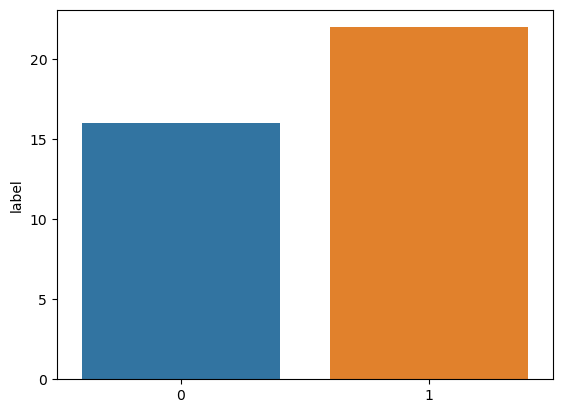

1    22
0    16
Name: label, dtype: int64

In [19]:
value_counts = y.value_counts()
sns.barplot(x=value_counts.index, y=value_counts)


# Display the plot
plt.show()
y.value_counts()

In [20]:
data = data.drop(["web-scraper-order", "web-scraper-start-url","links","links-href","role name","job number","pages","pages-href"], axis = 1)

In [21]:
data

,description,label
11,Description\n \n Position at EssenceMediacom\n...,0
13,Marketing Sciences Consultant/Senior Analyst -...,1
14,Description\n \n Position at mSix&Partners\n W...,0
15,??London/Anywhere (UK) \n \nAbout us: \n \n We...,1
23,Company Description,0
32,About Revolut\n\nPeople deserve more from thei...,1
33,Company Description,0
34,Job Description\n\nJOB DESCRIPTION\n\nOur core...,0
35,Job Description\n\nJOB DESCRIPTION\n\nOur core...,0
36,Job Description\n\nJOB DESCRIPTION\n\nOur core...,0


In [22]:
data = data.sample(frac = 1)

In [23]:
data.head()

,description,label
49,Principle Data Engineer - Up to £100k + Excell...,1
32,About Revolut\n\nPeople deserve more from thei...,1
44,Cyber Security Analyst\nLocation: London\nSala...,0
48,Job ID:R0249700Full/Part-Time: Full-timeRegula...,1
34,Job Description\n\nJOB DESCRIPTION\n\nOur core...,0


In [24]:
data.reset_index(inplace = True)
data.drop(["index"], axis = 1, inplace = True)

In [25]:
data.columns

Index(['description', 'label'], dtype='object')

In [26]:
data.head()

,description,label
0,Principle Data Engineer - Up to £100k + Excell...,1
1,About Revolut\n\nPeople deserve more from thei...,1
2,Cyber Security Analyst\nLocation: London\nSala...,0
3,Job ID:R0249700Full/Part-Time: Full-timeRegula...,1
4,Job Description\n\nJOB DESCRIPTION\n\nOur core...,0


In [27]:
def wordopt(description):
    description = description.lower()
    description = re.sub('\[.*?\]', '', description)
    description = re.sub("\\W"," ",description) 
    description = re.sub('https?://\S+|www\.\S+', '', description)
    description = re.sub('<.*?>+', '', description)
    description = re.sub('[%s]' % re.escape(string.punctuation), '', description)
    description = re.sub('\n', '', description)
    description = re.sub('\w*\d\w*', '', description)    
    return description

In [28]:
data["description"] = data["description"].apply(wordopt)

In [29]:
x = data["description"]
y = data["label"]

In [30]:
from sklearn.model_selection import train_test_split

# Assuming you have defined your feature data as 'x' and label data as 'y'
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the label data
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Fit the Decision Tree Classifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train_encoded)

DecisionTreeClassifier()

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of DecisionTreeClassifier
DT = DecisionTreeClassifier()

# Fit the Decision Tree Classifier
DT.fit(xv_train, y_train_encoded)

# Make predictions on the test set
pred_dt = DT.predict(xv_test)

In [36]:
DT.score(xv_test, y_test_encoded)

1.0

In [37]:
from sklearn.metrics import classification_report

# Assuming you have defined your predictions as 'pred_dt' and encoded labels as 'y_test_encoded'
print(classification_report(y_test_encoded, pred_dt))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [38]:
def output_lable(n):
    if n == 1:
        return "Fake job"
    elif n == 0:
        return "Not A Fake job"
    
def manual_testing(jobs):
    testing_news = {"text":[jobs]}
    new_def_test = pd.DataFrame(testing_jobs)
    new_def_test["description"] = new_def_test["description"].apply(wordopt) 
    new_x_test = new_def_test["description"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_DT = DT.predict(new_xv_test)
    
    return print("\n\nLR Prediction: {}".format(output_lable(pred_DT[0])))
                                                                                                              

In [ ]:
jobs = str(input())
manual_testing(jobs)